## House Price Prediction ML model for Delhi


### Data Preprocessing, Cleaning and Manipulation

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  #displays the plot below the code.
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)  #standardising the size of all our visuals.
import seaborn as sns
from sklearn.model_selection import train_test_split

In [82]:
house_df = pd.read_csv('House_price_dataset.csv')
house_df

,Unnamed: 0,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,17885,270,Independent Floor,1,28.640198,77.187279,Rajinder Nagar,Delhi West,Delhi,15000,K K LAVANIA,0.426038,13.787582,8.372242,3.271959
17886,17886,1000,Independent Floor,3,28.640209,77.187271,Rajinder Nagar,Delhi West,Delhi,38000,sanjeev,0.425040,13.787908,8.373653,3.272639
17887,17887,1400,Independent Floor,1,28.636087,77.177994,Rajinder Nagar,Delhi West,Delhi,47000,ANIL KUMAR BAREJA,0.682508,12.817571,8.207820,4.221707
17888,17888,900,Independent Floor,1,28.640995,77.179512,Rajinder Nagar,Delhi West,Delhi,8000,Manjit,0.184343,13.308030,8.669832,4.027845


In [83]:
house_df.drop(house_df.columns[house_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [84]:
house_df.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [85]:
house_df.tail()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
17885,270,Independent Floor,1,28.640198,77.187279,Rajinder Nagar,Delhi West,Delhi,15000,K K LAVANIA,0.426038,13.787582,8.372242,3.271959
17886,1000,Independent Floor,3,28.640209,77.187271,Rajinder Nagar,Delhi West,Delhi,38000,sanjeev,0.425040,13.787908,8.373653,3.272639
17887,1400,Independent Floor,1,28.636087,77.177994,Rajinder Nagar,Delhi West,Delhi,47000,ANIL KUMAR BAREJA,0.682508,12.817571,8.207820,4.221707
17888,900,Independent Floor,1,28.640995,77.179512,Rajinder Nagar,Delhi West,Delhi,8000,Manjit,0.184343,13.308030,8.669832,4.027845
17889,1000,Independent Floor,3,28.642803,77.188148,Rajinder Nagar,Delhi West,Delhi,38000,sanjeev,0.125044,14.048234,8.633506,3.184990


In [86]:
house_df.shape

(17890, 14)

In [87]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17890 entries, 0 to 17889
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size_sq_ft                17890 non-null  int64  
 1   propertyType              17890 non-null  object 
 2   bedrooms                  17890 non-null  int64  
 3   latitude                  17890 non-null  float64
 4   longitude                 17890 non-null  float64
 5   localityName              17890 non-null  object 
 6   suburbName                17890 non-null  object 
 7   cityName                  17890 non-null  object 
 8   price                     17890 non-null  int64  
 9   companyName               17890 non-null  object 
 10  closest_mtero_station_km  17890 non-null  float64
 11  AP_dist_km                17890 non-null  float64
 12  Aiims_dist_km             17890 non-null  float64
 13  NDRLW_dist_km             17890 non-null  float64
dtypes: flo

Hence, we get to see the basic details of our dataset

In [88]:
house_df.describe()

,size_sq_ft,bedrooms,latitude,longitude,price,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
count,17890.000000,17890.000000,17890.000000,17890.000000,1.789000e+04,17890.000000,17890.000000,17890.000000,17890.000000
mean,1176.342091,2.168865,28.609382,77.168368,3.345196e+04,0.931495,13.727784,11.238134,11.421994
std,873.751044,0.971414,0.099547,0.097611,8.802054e+04,8.287856,11.357063,11.167202,11.063323
min,100.000000,1.000000,19.185120,73.213829,1.200000e+03,0.000692,1.784779,0.634508,0.722023
25%,620.000000,1.000000,28.562540,77.103718,1.350000e+04,0.457782,11.018715,7.769267,7.986813
50%,900.000000,2.000000,28.611803,77.168755,2.200000e+04,0.698560,13.184035,10.515524,11.015571
75%,1600.000000,3.000000,28.651593,77.224998,3.500000e+04,1.087740,17.163502,15.514042,15.192483
max,16521.000000,15.000000,28.872597,80.358467,5.885646e+06,1096.479453,1109.894053,1115.621439,1123.778457


Here, we get to know some statistical information about our dataset.

In [89]:
house_df.isnull().sum()

size_sq_ft                  0
propertyType                0
bedrooms                    0
latitude                    0
longitude                   0
localityName                0
suburbName                  0
cityName                    0
price                       0
companyName                 0
closest_mtero_station_km    0
AP_dist_km                  0
Aiims_dist_km               0
NDRLW_dist_km               0
dtype: int64

Thus, we don't have any null values in our dataset.

In [90]:
house_df.groupby('suburbName')['suburbName'].agg('count')

suburbName
Delhi Central       2732
Delhi East          1933
Delhi North          176
Delhi South         3749
Delhi West           314
Dwarka              2435
North Delhi         1252
North West Delhi      11
Other               2706
Rohini               274
South West Delhi      86
West Delhi          2222
Name: suburbName, dtype: int64

In [135]:
# Dropping the unnecessary columns.

house_df2 = house_df.drop(['propertyType','latitude','longitude','cityName','companyName','AP_dist_km','Aiims_dist_km','NDRLW_dist_km'],axis="columns")
house_df2.head()

,size_sq_ft,bedrooms,localityName,suburbName,price,closest_mtero_station_km
0,400,1,Swasthya Vihar,Delhi East,9000,0.577495
1,1050,2,mayur vihar phase 1,Delhi East,20000,0.417142
2,2250,2,Swasthya Vihar,Delhi East,28000,0.125136
3,1350,2,Krishna Nagar,Delhi East,28000,0.371709
4,450,2,New Ashok Nagar,Delhi East,12500,1.087760


In [136]:
#Investigating the bedrooms column
house_df2['bedrooms'].unique()

array([ 1,  2,  3,  4,  5,  6,  7, 10, 15, 12,  8,  9], dtype=int64)

In [137]:
# Renaming the bedrooms column as size_BHK to make it more readable and useful
house_df2.rename(columns = {'bedrooms':'size_BHK'}, inplace = True)

In [138]:
house_df2.head()

,size_sq_ft,size_BHK,localityName,suburbName,price,closest_mtero_station_km
0,400,1,Swasthya Vihar,Delhi East,9000,0.577495
1,1050,2,mayur vihar phase 1,Delhi East,20000,0.417142
2,2250,2,Swasthya Vihar,Delhi East,28000,0.125136
3,1350,2,Krishna Nagar,Delhi East,28000,0.371709
4,450,2,New Ashok Nagar,Delhi East,12500,1.087760


In [139]:
house_df2['size_sq_ft'].unique()

array([  400,  1050,  2250,  1350,   450,   600,   900,   680,   360,
         700,  1000,  1080,  3000,   500,   390,  1200,   800,  1700,
        1150,  1800,   430,   350,   300,   270,   320,   650,  1300,
         550,  1650,  2350,   530,  1550,  1400,   640,  2000,  1620,
        1750,  1500,   200,   250,  1250,  1900,   750,  1950,  1850,
        1600,  2450,  1100,  1450,   850,   210,   420,   620,   630,
         370,   260,   280,   580,   180,   380,   480,   410,   220,
         460,   490,   980,   590,   290,   398,   690,   240,   670,
         698,   598,   340,   520,   540,   790,  2600,   860,   402,
         465,   950,   219,  2200,  2300,  2400,   100,  2100,  1710,
         651,   451,  1530,  2160,   760,   560,  2700,   517, 16000,
       11000, 15000,   510,   378,   660,   555,  1780, 15800,   375,
        1275,   160,   225,   150,   625,   675,   720,   455,  2140,
         325,  4950,  1060,   985,  1790,  1510,   655,  4410,   995,
        3600,  1953,

In [140]:
house_df2['price_per_sqft']=house_df2['price']/house_df2['size_sq_ft']
house_df2.head()

,size_sq_ft,size_BHK,localityName,suburbName,price,closest_mtero_station_km,price_per_sqft
0,400,1,Swasthya Vihar,Delhi East,9000,0.577495,22.500000
1,1050,2,mayur vihar phase 1,Delhi East,20000,0.417142,19.047619
2,2250,2,Swasthya Vihar,Delhi East,28000,0.125136,12.444444
3,1350,2,Krishna Nagar,Delhi East,28000,0.371709,20.740741
4,450,2,New Ashok Nagar,Delhi East,12500,1.087760,27.777778


In [141]:
len(house_df2.localityName.unique())

781

Hence, we see that we have so many localities in Delhi. This is a dimensinality problem in the analysis and to over come it that is to reduce the dimension we will first find out the localities which are associated with very few data points and then replace them by Other.

In [142]:
house_df2.localityName = house_df2.localityName.apply(lambda x : x.strip())
locality_stats = house_df2.groupby('localityName')['localityName'].agg('count').sort_values(ascending=False)
locality_stats

localityName
Patel Nagar                  1448
Paschim Vihar                 949
Chattarpur                    826
Pitampura                     609
mayur vihar phase 1           523
                             ... 
Sector 12                       1
Sector 11 Dwarka Pocket 2       1
Jagat Ram Park                  1
Sector 11                       1
10 Sector Dwarka                1
Name: localityName, Length: 781, dtype: int64

In [143]:
len(locality_stats[locality_stats<=10])

599

In [144]:
localities_with_less_than_10_points = locality_stats[locality_stats<=10]

In [145]:
house_df2.localityName= house_df2.localityName.apply(lambda x: 'Other' if x in localities_with_less_than_10_points else x)
len(house_df2.localityName.unique())

183

Wohooo !! We finally have 183 localities in our dataset now, and this sounds really sorted.

In [146]:
#Checking for irregularities
house_df2[house_df2.size_sq_ft/house_df2.size_BHK<300].agg('count')

size_sq_ft                  1144
size_BHK                    1144
localityName                1144
suburbName                  1144
price                       1144
closest_mtero_station_km    1144
price_per_sqft              1144
dtype: int64

In [147]:
house_df2=house_df2[~(house_df2.size_sq_ft/house_df2.size_BHK<300)]
house_df2.shape

(16746, 7)

In [148]:
# Renaming the suburbs , i.e, naming them accurately for example:-
# North Delhi and Delhi North are same and should be named as North Delhi.

house_df2['suburbName'].replace('Delhi North','North Delhi',inplace=True)
house_df2['suburbName'].replace('Delhi West','West Delhi',inplace=True)
house_df2['suburbName'].replace('Delhi East','East Delhi',inplace=True)
house_df2['suburbName'].replace('Delhi South','South Delhi',inplace=True)
house_df2['suburbName'].replace('Delhi Central','Central Delhi',inplace=True)
house_df2.rename(columns = {'suburbName':'District'}, inplace = True)

In [149]:
house_df2.District.unique()

array(['East Delhi', 'Rohini', 'South Delhi', 'West Delhi', 'North Delhi',
       'Dwarka', 'Central Delhi', 'Other', 'South West Delhi',
       'North West Delhi'], dtype=object)

### Data Analysis and Visualisation

Text(0, 0.5, 'Price per SqFt')

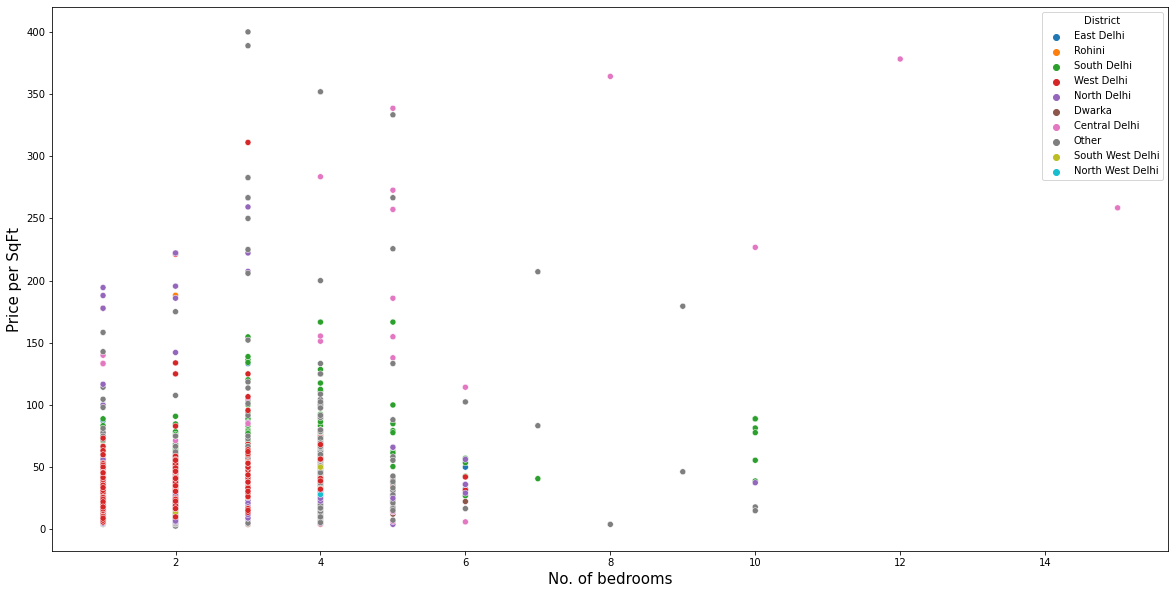

In [151]:
scatter_plot = sns.scatterplot(data=house_df2,x="size_BHK", y="price_per_sqft",hue='District')
scatter_plot.set_xlabel('No. of bedrooms', fontdict ={'size':15})
scatter_plot.set_ylabel('Price per SqFt', fontdict ={'size':15})

From the above plot, we get to know that on an average basis, West Delhi as small flats with 4 as the maximum nunber of rooms and the prices are also quite low. 
Central Delhi has an intermediate price range for flats with upto 6 rooms but for bigger flats the price increases.
South Delhi has big flats with more than 6 rooms in a fair price range.
North Delhi has high price range for even small flats with upto 6 rooms.

Text(0, 0.5, 'Count')

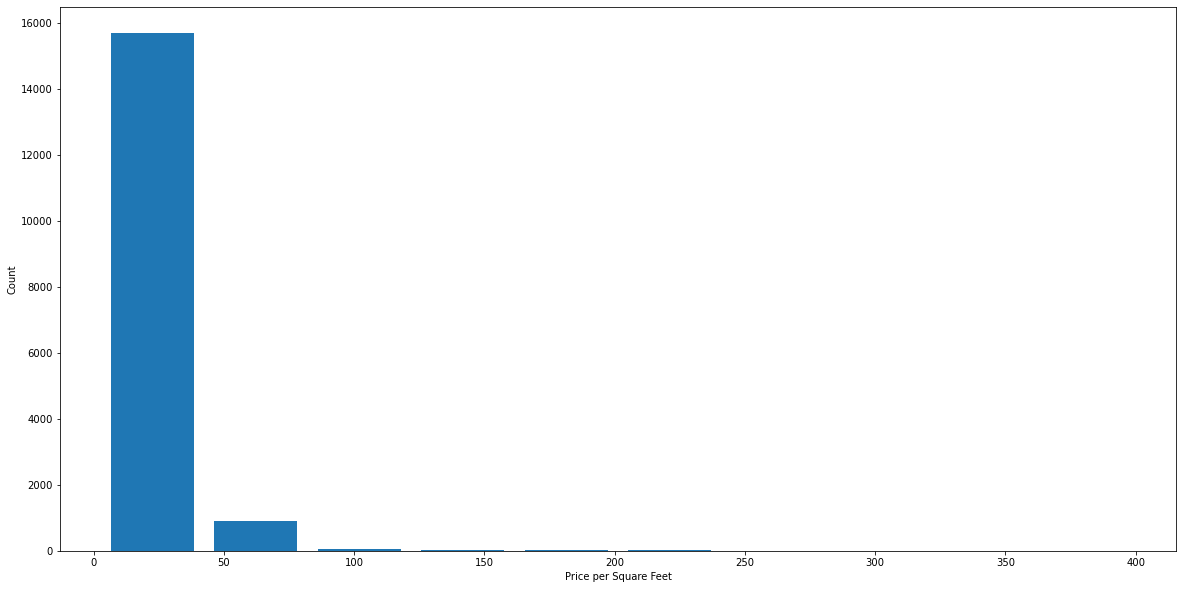

In [152]:
plt.hist(house_df2.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

So, we see that majority of the flats are in the range of 0 to 100 price per sqft, which indeed is good.

In [114]:
house_df2.closest_mtero_station_km.describe()

count    16746.000000
mean         0.941129
std          8.564025
min          0.000692
25%          0.461539
50%          0.707966
75%          1.099802
max       1096.479453
Name: closest_mtero_station_km, dtype: float64

In [158]:
house_df2["closest_mtero_station_metres"]=house_df2["closest_mtero_station_km"]*1000
house_df3 = house_df2.drop(['closest_mtero_station_km'], axis='columns')
house_df3.head()

,size_sq_ft,size_BHK,localityName,District,price,price_per_sqft,closest_mtero_station_metres
0,400,1,Swasthya Vihar,East Delhi,9000,22.500000,577.495488
1,1050,2,mayur vihar phase 1,East Delhi,20000,19.047619,417.142283
2,2250,2,Swasthya Vihar,East Delhi,28000,12.444444,125.136043
3,1350,2,Krishna Nagar,East Delhi,28000,20.740741,371.709423
5,600,2,New Ashok Nagar,East Delhi,10000,16.666667,523.298135


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closest_mtero_station_metres', ylabel='Density'>

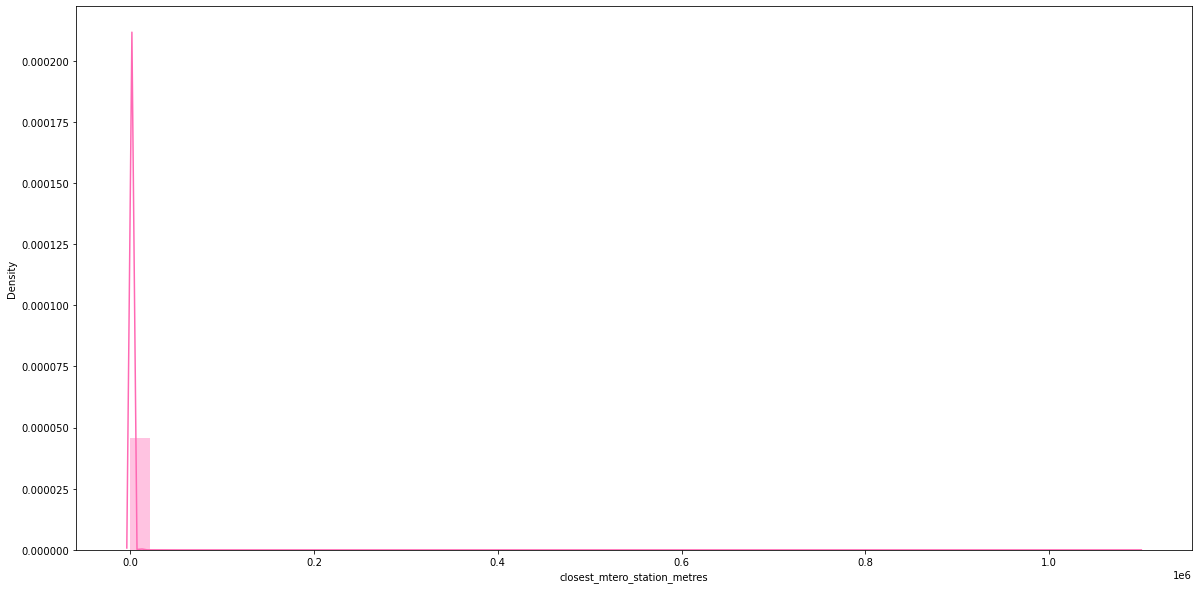

In [157]:
sns.distplot(house_df3["closest_mtero_station_metres"],color='hotpink')

From the above plot we conclude that most of the flats are located close to the metro stations.

<AxesSubplot:xlabel='District'>

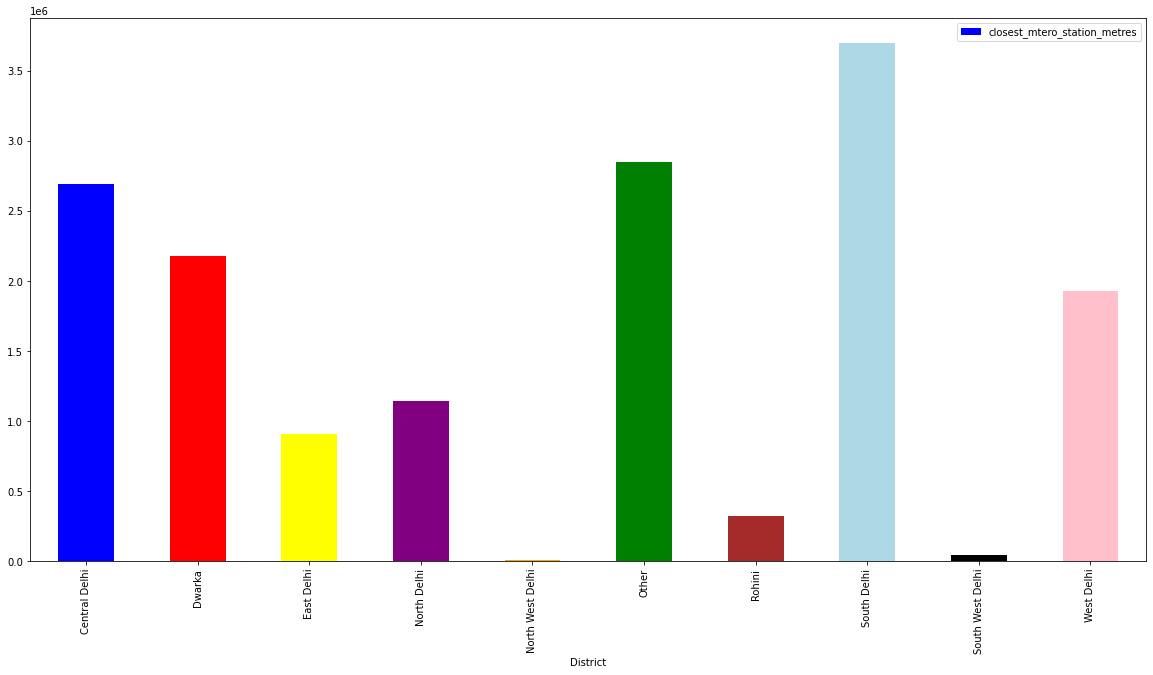

In [134]:
my_colors=['blue','red','yellow','purple','orange','green','brown','lightblue','black','pink']
house_df3.groupby(['District']).sum().plot( kind='bar', y='closest_mtero_station_metres', color=my_colors) 

From the above plot we conclude that most of the flats in North West Delhi, Rohini and South West Delhi are really close to metro stations whereas, houses in South Delhi are quite far from metro stations.

## Data Modelling

In [154]:
district_dummies = pd.get_dummies(house_df3.District)
district_dummies.head()

,Central Delhi,Dwarka,East Delhi,North Delhi,North West Delhi,Other,Rohini,South Delhi,South West Delhi,West Delhi
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0


In [160]:
house_df4=pd.concat([house_df3,district_dummies.drop('West Delhi', axis='columns')], axis='columns')

In [161]:
house_df4.head()

,size_sq_ft,size_BHK,localityName,District,price,price_per_sqft,closest_mtero_station_metres,Central Delhi,Dwarka,East Delhi,North Delhi,North West Delhi,Other,Rohini,South Delhi,South West Delhi
0,400,1,Swasthya Vihar,East Delhi,9000,22.500000,577.495488,0,0,1,0,0,0,0,0,0
1,1050,2,mayur vihar phase 1,East Delhi,20000,19.047619,417.142283,0,0,1,0,0,0,0,0,0
2,2250,2,Swasthya Vihar,East Delhi,28000,12.444444,125.136043,0,0,1,0,0,0,0,0,0
3,1350,2,Krishna Nagar,East Delhi,28000,20.740741,371.709423,0,0,1,0,0,0,0,0,0
5,600,2,New Ashok Nagar,East Delhi,10000,16.666667,523.298135,0,0,1,0,0,0,0,0,0


In [163]:
house_df5 = house_df4.drop(['District','localityName'],axis='columns')

In [164]:
house_df5.head()

,size_sq_ft,size_BHK,price,price_per_sqft,closest_mtero_station_metres,Central Delhi,Dwarka,East Delhi,North Delhi,North West Delhi,Other,Rohini,South Delhi,South West Delhi
0,400,1,9000,22.500000,577.495488,0,0,1,0,0,0,0,0,0
1,1050,2,20000,19.047619,417.142283,0,0,1,0,0,0,0,0,0
2,2250,2,28000,12.444444,125.136043,0,0,1,0,0,0,0,0,0
3,1350,2,28000,20.740741,371.709423,0,0,1,0,0,0,0,0,0
5,600,2,10000,16.666667,523.298135,0,0,1,0,0,0,0,0,0


In [165]:
# Segregating the data into dependent and independent variables.
# Independent Variables are clubbed as x and Dependent variable is y wich is our price.
X = house_df5.drop('price', axis='columns')
X.head()

,size_sq_ft,size_BHK,price_per_sqft,closest_mtero_station_metres,Central Delhi,Dwarka,East Delhi,North Delhi,North West Delhi,Other,Rohini,South Delhi,South West Delhi
0,400,1,22.500000,577.495488,0,0,1,0,0,0,0,0,0
1,1050,2,19.047619,417.142283,0,0,1,0,0,0,0,0,0
2,2250,2,12.444444,125.136043,0,0,1,0,0,0,0,0,0
3,1350,2,20.740741,371.709423,0,0,1,0,0,0,0,0,0
5,600,2,16.666667,523.298135,0,0,1,0,0,0,0,0,0


In [166]:
Y = house_df5.price
Y.head()

0     9000
1    20000
2    28000
3    28000
5    10000
Name: price, dtype: int64

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)

In [168]:
from sklearn.linear_model import LinearRegression
house_lr_model = LinearRegression()
house_lr_model.fit(x_train, y_train)
house_lr_model.score(x_test, y_test)

0.7060106439016076

In [171]:
from sklearn.svm import SVR
house_svr_model = SVR(kernel="rbf")
house_svr_model.fit(X,Y)

SVR()

In [173]:
house_svr_model.score(X,Y)

-0.015316155485643579

In [174]:
from sklearn.ensemble import RandomForestRegressor
house_rf_model = RandomForestRegressor(n_estimators=100)
house_rf_model.fit(x_train,y_train)
house_rf_model.score(x_test, y_test)

0.8898134535065458

Hence,from the above trials we conclude that the best algorithm for our dataset is Random Forest Classifier giving a score of 0.889 !

In [176]:
y_pred= house_rf_model.predict(x_test)
y_pred
y_test= list(y_test)
type(y_test)

list

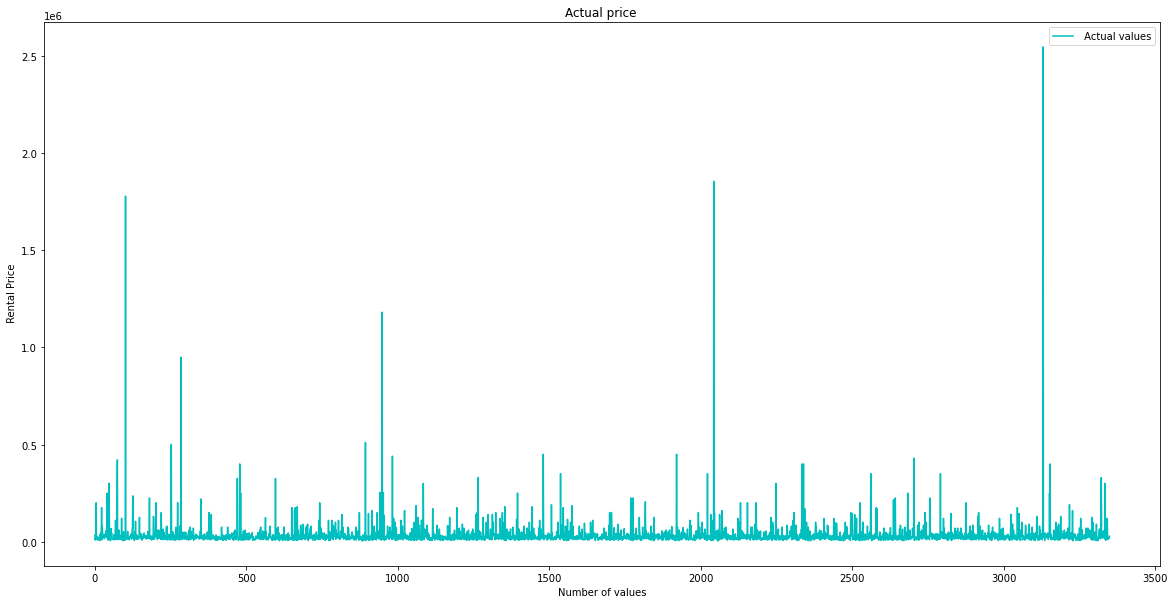

In [179]:
#Plotting the actual values of the rental prices across Delhi.

plt.plot(y_test,color='c',label=' Actual values')
plt.title("Actual price ")
plt.xlabel("Number of values")
plt.ylabel(" Rental Price")
plt.legend()
plt.show()

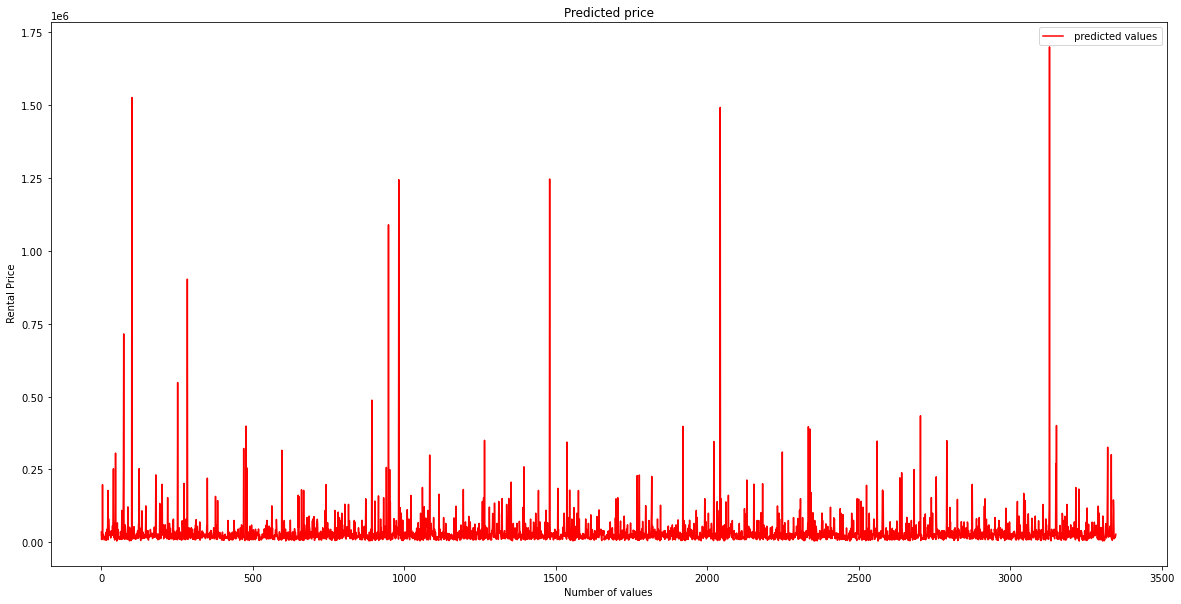

In [180]:
#Plotting the predicted values (generated by our model) of the rental prices across Delhi.

plt.plot(y_pred, color='r',label=' predicted values')
plt.title("Predicted price")
plt.xlabel("Number of values")
plt.ylabel(" Rental Price")
plt.legend()
plt.show()

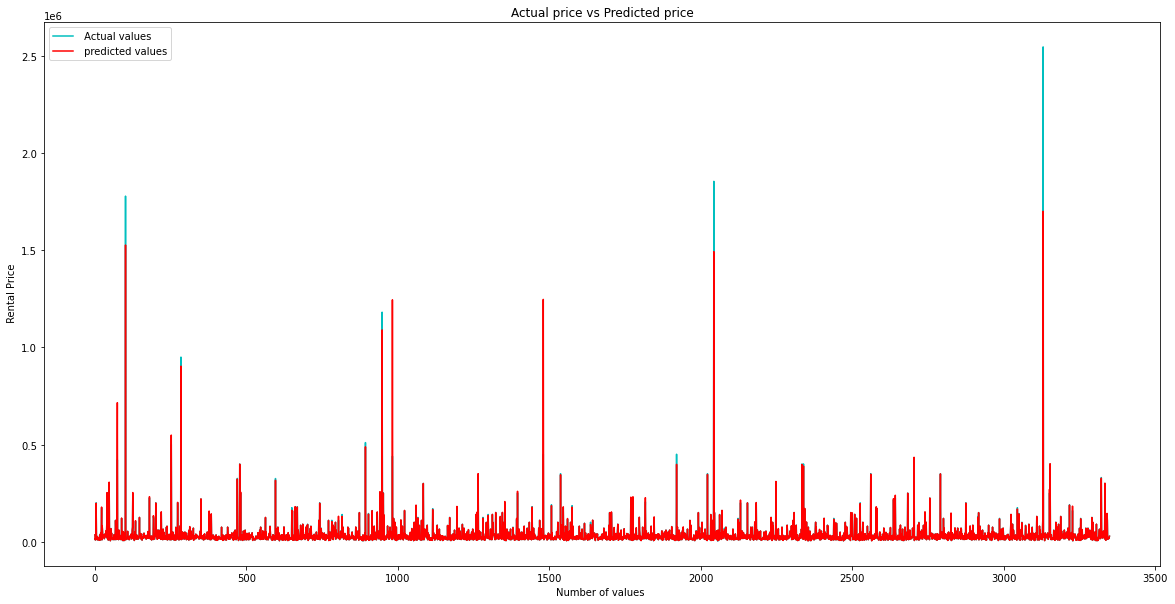

In [181]:
#Comparing the actual and predicted values of the rental prices across Delhi.

plt.plot(y_test,color='c',label=' Actual values')
plt.plot(y_pred, color='r',label=' predicted values')
plt.title("Actual price vs Predicted price")
plt.xlabel("Number of values ")
plt.ylabel(" Rental Price")
plt.legend()
plt.show()

From the above plot, it is clearly visible that the actual and predicted Rental Prices for houses in Delhi are really close to each other.
Hence, our model is successfully predicting the Rental prices !!

### Saving and testing our model.

In [184]:
import pickle

# Saving the model

filename="Iris_Model_Saved.sav"
try:
    with open (filename, "wb") as file:
        pickle.dump(house_rf_model, file)
    print("Model saved successfully")
except Exception as e:
    print(f"Error saving the model:{e}")
        

Model saved successfully


In [185]:
load_model=pickle.load(open(filename,'rb'))

In [186]:
load_model.predict([[600,2,16.666667,523.298135,0,0,1,0,0,0,0,0,0]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10000.])

#### Wohoooooo !!! Our model is predicting the rental prices accurately.

### Hence, our model is successfully generating the required results upon recieving the input from the user.